In [8]:
import osmnx as ox
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import os

In [9]:
def fetch_road_graph():
    boroughs = ['Bronx, New York, USA', 'Brooklyn, New York, USA',
                'Manhattan, New York, USA', 'Queens, New York, USA',
                'Staten Island, New York, USA']
    
    print("Getting graph of NYC boroughs")
    
    G = ox.graph_from_place(boroughs, network_type='drive', simplify=True)
    
    # Check if the graph has 'maxspeed' attribute for edges
    has_speed_data = False
    for u, v, data in G.edges(data=True):
        if 'maxspeed' in data:
            has_speed_data = True
            break

    print(f"Graph has speed limit data: {has_speed_data}")

    if has_speed_data:
    # Extract speed values for color mapping
        speeds = []
        for u, v, data in G.edges(data=True):
            if 'maxspeed' in data:
                # Handle the case where maxspeed is a list
                speed_value = data['maxspeed']
                try:
                    if isinstance(speed_value, list):
                        # Take the first value if it's a list
                        speed_str = str(speed_value[0])
                    else:
                        # Otherwise, treat it as a string
                        speed_str = str(speed_value).split(';')[0]
                    
                    # Extract numeric value (e.g., "30 mph" -> 30)
                    speed = float(speed_str.split()[0])
                    speeds.append(speed)
                except:
                    speeds.append(0)
            else:
                speeds.append(0)

    return G, has_speed_data, speeds

Graph loaded from 'nyc_roads.graphml'
Map saved as 'nyc_roads_map.png'


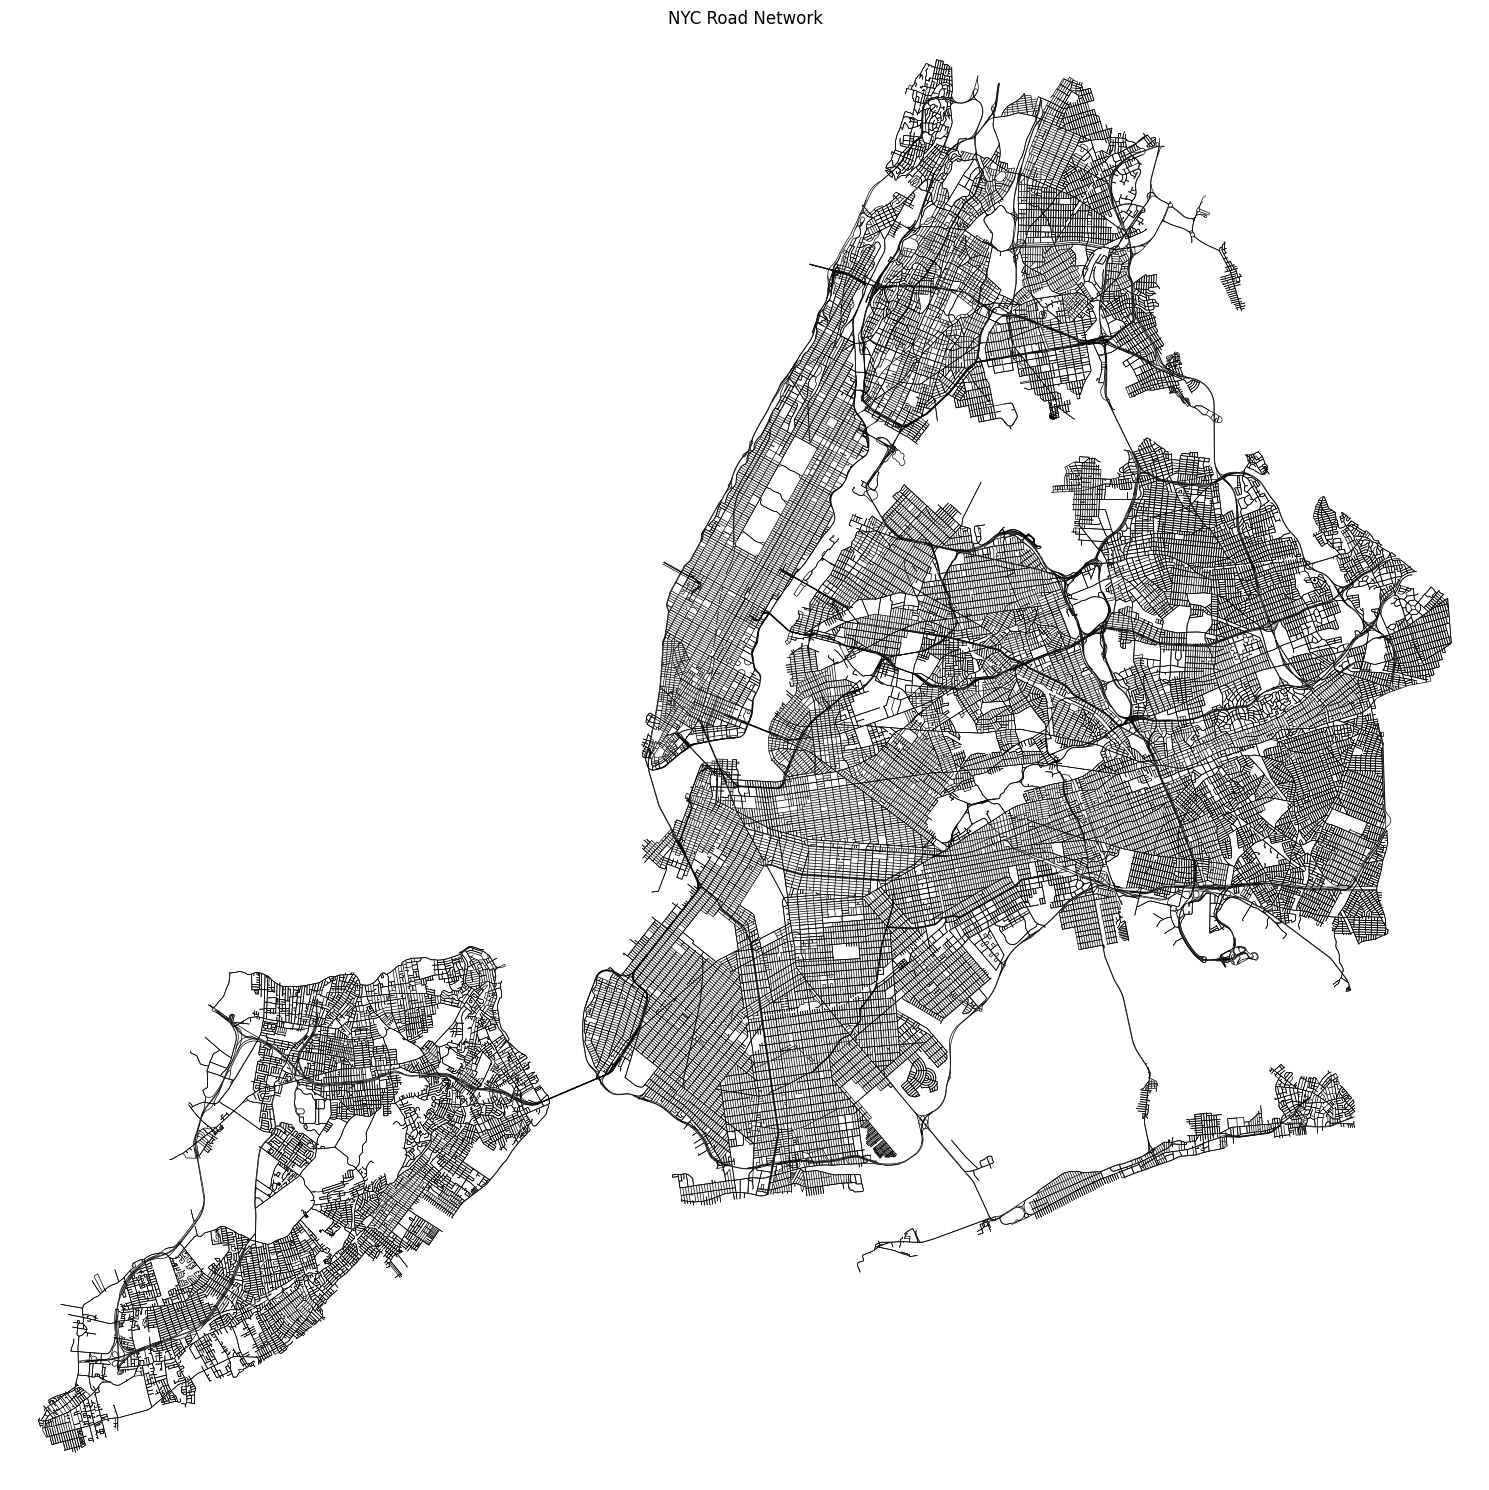

In [10]:
def generate_real_city_data():
    # Don't fetch the graph if it already exists
    if not os.path.exists("nyc_roads.graphml"):
        G, has_speed_data, speeds = fetch_road_graph()

        ox.save_graphml(G, filepath="nyc_roads.graphml")
        print("Graph saved as 'nyc_roads.graphml'")
    else:
        G = ox.load_graphml("nyc_roads.graphml")
        print("Graph loaded from 'nyc_roads.graphml'")

    # Plot the graph
    fig, ax = plt.subplots(figsize=(15, 15))
    ox.plot_graph(G, ax=ax, node_size=0, edge_linewidth=0.5, edge_color='black', show=False)
    plt.title("NYC Road Network")

    plt.tight_layout()
    plt.savefig("nyc_roads_map.png", dpi=300)
    print("Map saved as 'nyc_roads_map.png'")
    plt.show()
    
generate_real_city_data()
